<a href="https://colab.research.google.com/github/Rds1007/DLCVNLP/blob/master/gc_sal_predict_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [48]:
df= pd.read_csv(r"/content/drive/My Drive/NN_Salary_Predict/adult.data",sep=',',
                 names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary'])

In [49]:
X=df.drop('salary',axis="columns")


In [50]:
X_cat = X.select_dtypes(include=[object])
X_noncatc = X.select_dtypes(exclude=[object])

In [51]:
#Applying One Hot Encoding 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
df_processed_np = ohe.fit_transform(X_cat)

In [52]:
x = pd.concat([X_noncatc,pd.DataFrame(df_processed_np)],axis=1,ignore_index=True)

In [53]:
#x

In [54]:
# demonstrate data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# load data
data = x
# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
normalized = scaler.fit_transform(data)
# inverse transform
#inverse = scaler.inverse_transform(normalized)

In [55]:
x= pd.DataFrame(normalized)

In [56]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [57]:
df['salary'] = np.where(df['salary']==' <=50K',0,1)

In [58]:
y=df['salary']

In [59]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=2)

In [60]:
# normalize all the data points and cast the labels to int64
import tensorflow as tf
train_x, test_x = tf.cast(train_x, tf.int64), tf.cast(test_x, tf.int64)
train_y, test_y = tf.cast(train_y,tf.int64),tf.cast(test_y,tf.int64)

In [61]:
salmodel = tf.keras.models.Sequential();
salmodel.add(tf.keras.layers.Flatten())
salmodel.add(tf.keras.layers.Dense(108,input_dim=108, activation='relu'))
salmodel.add(tf.keras.layers.Dense(54,input_dim=108, activation='relu'))
salmodel.add(tf.keras.layers.Dense(1,activation='sigmoid'))
salmodel.compile (optimizer= tf.keras.optimizers.Adam(), loss='binary_crossentropy',metrics = ['accuracy'])

In [62]:
salmodel.fit(train_x, train_y, batch_size=8, epochs=50)

Epoch 1/50
3663/3663 [==============================] - 7s 2ms/step - loss: 0.3685 - accuracy: 0.8266
Epoch 2/50
3663/3663 [==============================] - 6s 2ms/step - loss: 0.3559 - accuracy: 0.8332
Epoch 3/50
3663/3663 [==============================] - 6s 2ms/step - loss: 0.3522 - accuracy: 0.8352
Epoch 4/50
3663/3663 [==============================] - 6s 2ms/step - loss: 0.3493 - accuracy: 0.8369
Epoch 5/50
3663/3663 [==============================] - 6s 2ms/step - loss: 0.3464 - accuracy: 0.8384
Epoch 6/50
3663/3663 [==============================] - 6s 2ms/step - loss: 0.3439 - accuracy: 0.8396
Epoch 7/50
3663/3663 [==============================] - 7s 2ms/step - loss: 0.3411 - accuracy: 0.8411
Epoch 8/50
3663/3663 [==============================] - 6s 2ms/step - loss: 0.3382 - accuracy: 0.8411
Epoch 9/50
3663/3663 [==============================] - 6s 2ms/step - loss: 0.3348 - accuracy: 0.8428
Epoch 10/50
3663/3663 [==============================] - 6s 2ms/step - loss: 0.332

In [79]:
salmodel.evaluate(test_x, test_y)

102/102 [==============================] - 0s 2ms/step - loss: 0.7375 - accuracy: 0.8173


[0.7374556064605713, 0.8173165321350098]

In [72]:
predict = salmodel.predict(test_x)

In [73]:
y_pred =[]
for i in range(len(predict)):
    y_pred.append(np.where(predict[i]>0.5,1,0))


In [74]:
results= pd.DataFrame(y_pred,columns=['result'])

In [76]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(test_y,results))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2444
           1       0.67      0.54      0.60       813

    accuracy                           0.82      3257
   macro avg       0.76      0.72      0.74      3257
weighted avg       0.81      0.82      0.81      3257



In [77]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(test_y, results)
print(cm)

[[2224  220]
 [ 375  438]]


Text(69.0, 0.5, 'Truth')

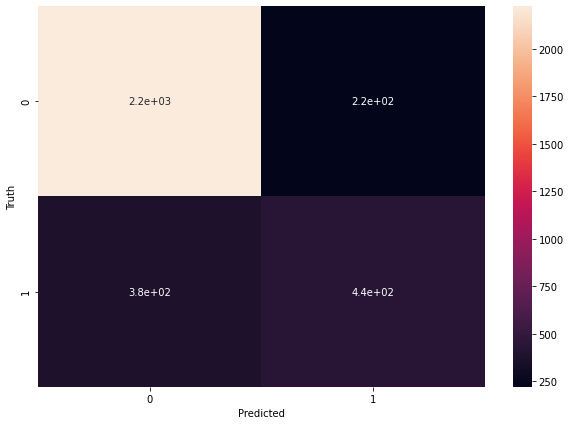

In [69]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
salmodel.save("salmodel2.h5")